In [2]:
import os
import cmocean as cmo
import colorcet as cc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from popurri import spectrograph as spc
from popurri import plotutils

# mpl.rcdefaults()
plotutils.mpl_custom_basic()
plotutils.mpl_size_same(font_size=18)

# Testing
%load_ext autoreload
%autoreload 2

In [3]:
dirout = './plot_spectrograph/'

## All instrument properties

Load and show available instruments and their properties

In [4]:
dfinstprop = spc.SpectrographsProperties(dirout=dirout)
dfinstprop.data

,R,spectral_sampling_px,pixel_ms,wmin_nm,wmax_nm,ndet,ndet_raw,nord,ord_ref,nslice,...,tel_nice,tel_acronym_nice,tel_diameter,observatory,observatory_nice,observatory_acronym_nice,year_start,year_end,ref,notes
inst,,,,,,,,,,,,,,,,,,,,,
carmvis,94600,2.50,1258.0,520.0,960.0,NaN,NaN,61.0,36.0,1.0,...,NaN,NaN,3.6,caha,NaN,CAHA,2016.0,NaN,NaN,NaN
carmnir,80400,2.80,1356.0,960.0,1710.0,NaN,NaN,28.0,NaN,1.0,...,NaN,NaN,3.6,caha,NaN,CAHA,2016.0,NaN,NaN,NaN
crires,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
criresplus,"[43000, 92000]",NaN,NaN,950.0,5300.0,3.0,3.0,NaN,NaN,NaN,...,Very Large Telescope,VLT,8.2,paranal,Paranal,Paranal,NaN,NaN,NaN,Number of orders and resolution depend on spec...
espresso,"[70000,190000]",NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,2.0,...,Very Large Telescope,VLT,8.2,paranal,Paranal,Paranal,2017.0,NaN,pepe_et_al_2021,"General ESPRESSO key, mean of all modes"
espresso_uhr11,190000,2.50,NaN,NaN,NaN,1.0,2.0,NaN,NaN,2.0,...,Very Large Telescope,VLT,8.2,paranal,Paranal,Paranal,2017.0,NaN,pepe_et_al_2021,NaN
espresso_hr11,138000,4.50,NaN,NaN,NaN,1.0,2.0,NaN,NaN,2.0,...,Very Large Telescope,VLT,8.2,paranal,Paranal,Paranal,2017.0,NaN,pepe_et_al_2021,NaN
espresso_hr21,138000,4.50,NaN,NaN,NaN,1.0,2.0,NaN,NaN,2.0,...,Very Large Telescope,VLT,8.2,paranal,Paranal,Paranal,2017.0,NaN,pepe_et_al_2021,NaN
espresso_hr42,130000,2.25,NaN,NaN,NaN,1.0,2.0,NaN,NaN,2.0,...,Very Large Telescope,VLT,8.2,paranal,Paranal,Paranal,2017.0,NaN,pepe_et_al_2021,NaN


### Example plots

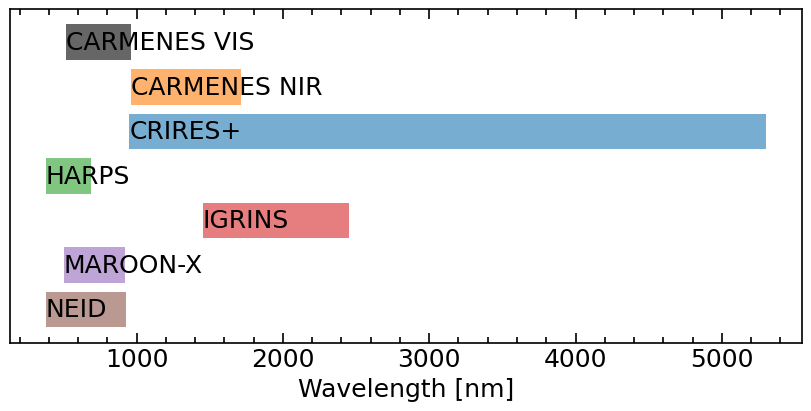

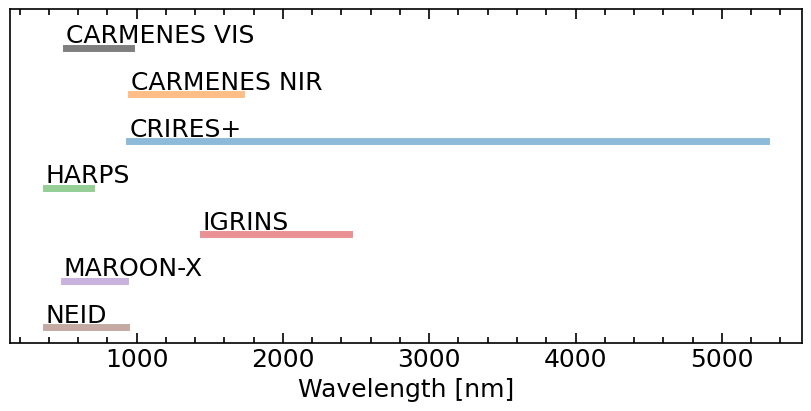

In [5]:
# Plot wavelength range of all available instruments
dfinstprop.fig_wrange(sh=True, sv=True, style='rectangle')  #default style
dfinstprop.fig_wrange(sh=True, sv=True, style='line')

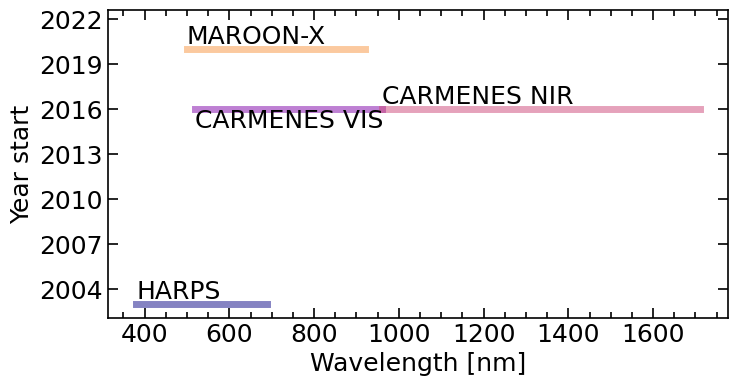

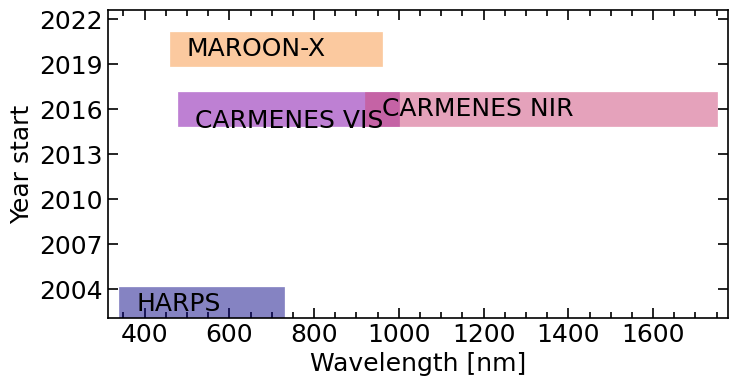

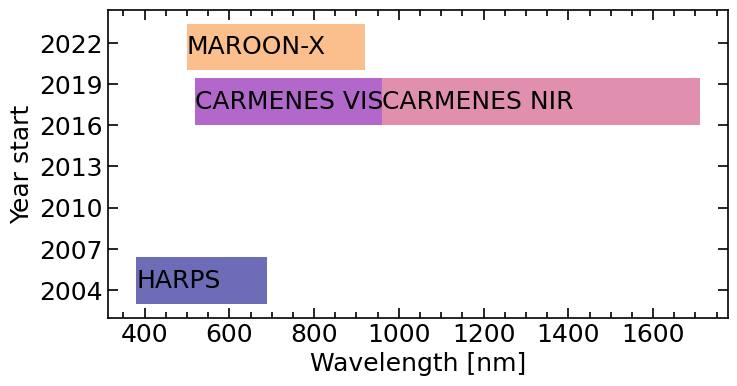

In [6]:
# Plot wavelength range of selected instruments, ordered by year
fig, ax = plt.subplots(figsize=(8, 4))
dfinstprop.plot_wrange_line(ax=ax, lisinst=['harps', 'harpsn', 'espresso', 'carmvis', 'carmnir', 'neid', 'maroonx'], yprop='year_start', cmap='plasma', va=['bottom', 'bottom', 'bottom', 'top', 'bottom', 'bottom', 'bottom'])  # va='center', lw=25
plt.show()
plt.close()

# Thick lines: wrange changes
fig, ax = plt.subplots(figsize=(8, 4))
dfinstprop.plot_wrange_line(ax=ax, lisinst=['harps', 'harpsn', 'espresso', 'carmvis', 'carmnir', 'neid', 'maroonx'], yprop='year_start', cmap='plasma', va=['center', 'center', 'center', 'top', 'center', 'center', 'center'], lw=25)  # va='center', lw=25
plt.show()
plt.close()

# With the rectangle style, the wavelength range doesn't change
fig, ax = plt.subplots(figsize=(8, 4))
dfinstprop.plot_wrange_rectangle(ax=ax, lisinst=['harps', 'harpsn', 'espresso', 'carmvis', 'carmnir', 'neid', 'maroonx'], yprop='year_start', cmap='plasma')
plt.show()
plt.close()

## Single instrument

In [7]:
# Initialise spectrograph

inst = 'harps'
harps = spc.Spectrograph(inst, dirout)

# Show basic properties
harps.print_properties_nice()

Instrument str: harps
R: 115000
Mean sampling: 3.2
Pixel sampling [m/s]: 820.0
$\lambda_\mathrm{min}$ [nm]: 380.0
$\lambda_\mathrm{max}$ [nm]: 690.0
Number of detectors: nan
Real number of detectors: nan
Number of orders: 72.0
Reference order: 55.0
Number of slices: nan
Real number of slices: nan
Number of pixels spectral direction: nan
Readout noise [e-]: nan
Conversion factor [e-/ADU]: nan
Position: nan
Type: fiber
Instrument: nan
Instrument acronym: HARPS
Telescope str: nan
Telescope: nan
Telescope acronym: nan
Telescope diameter: nan
Observatory str: lasilla
Observatory: La Silla
Observatory acronym: La Silla
Year start: 2003.0
Year end: nan
Reference: mayor_et_al_2003
Notes: nan


In [8]:
harps.dataords

,ord_real,w_central_nm,y_central_pix,y _central_arcsec,FSR_nm,FSR_min_nm,FSR_max_nm,wmin_nm,wmax_nm,TS_range_nm,CCD,ord,wmin_A,wmax_A
ord,,,,,,,,,,,,,,
0,161,380.25,47,12,2.36,378.75,381.11,377.96,382.20,4.24,linda,0,3779.6,3822.0
1,160,382.63,79,20,2.39,381.11,383.50,380.32,384.59,4.27,linda,1,3803.2,3845.9
2,159,385.03,111,28,2.42,383.50,385.92,382.71,387.00,4.29,linda,2,3827.1,3870.0
3,158,387.47,143,36,2.45,385.92,388.37,385.13,389.45,4.32,linda,3,3851.3,3894.5
4,157,389.94,176,44,2.48,388.37,390.85,387.58,391.93,4.35,linda,4,3875.8,3919.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,93,658.19,1601,400,7.07,654.19,661.26,654.20,661.57,7.37,jasmin,67,6542.0,6615.7
68,92,665.34,1694,423,7.23,661.26,668.49,661.31,668.76,7.45,jasmin,68,6613.1,6687.6
69,91,672.65,1788,447,7.39,668.49,675.88,668.57,676.11,7.54,jasmin,69,6685.7,6761.1


### Plot orders

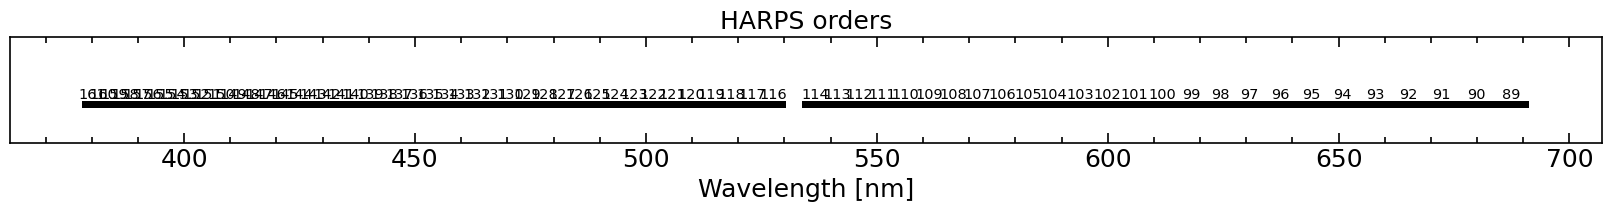

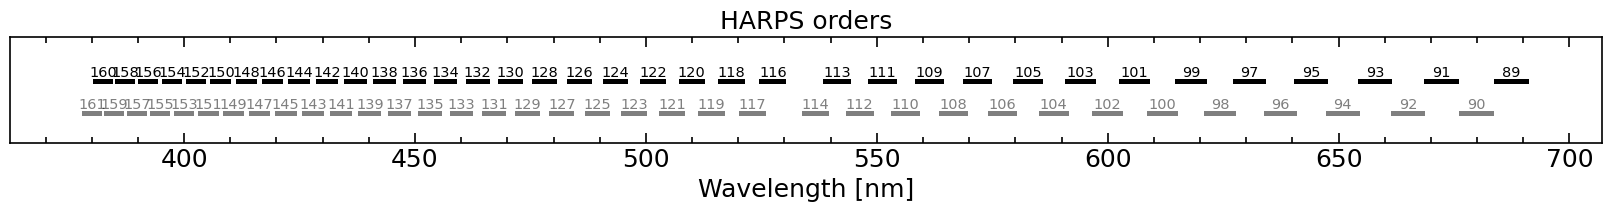

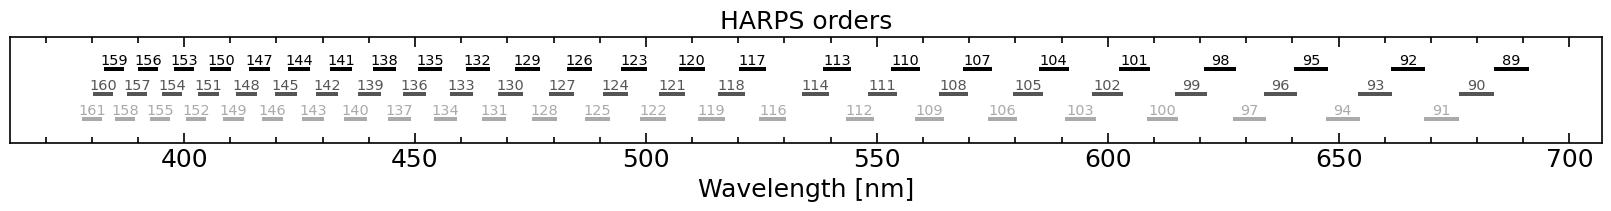

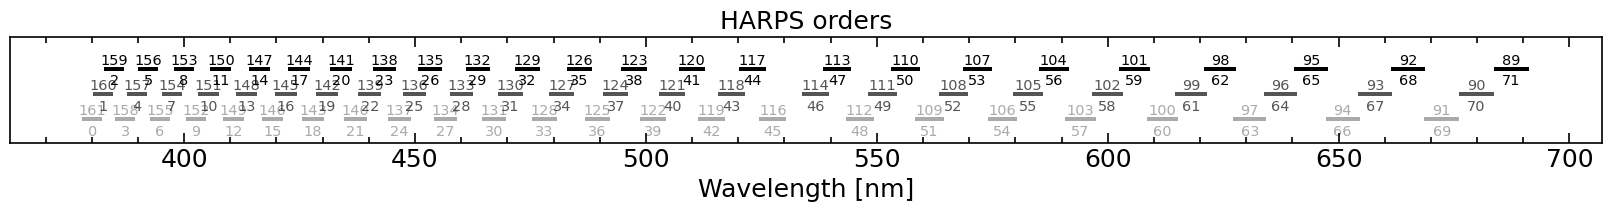

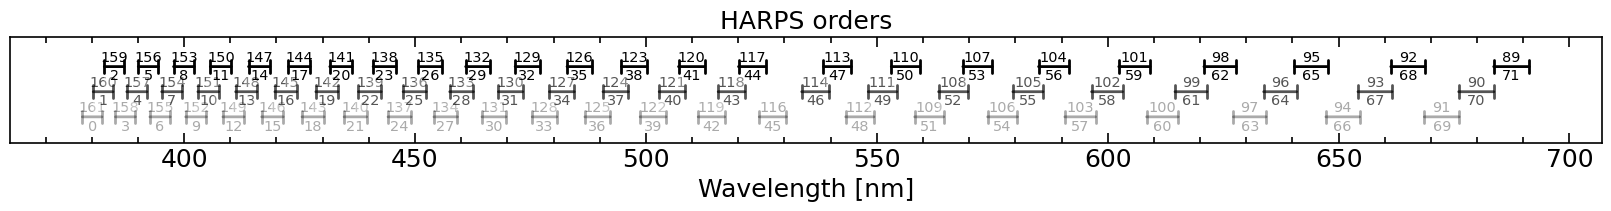

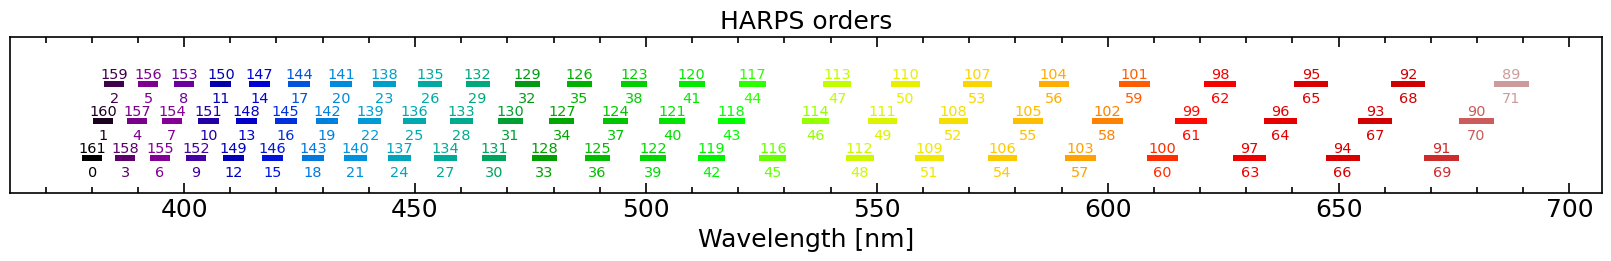

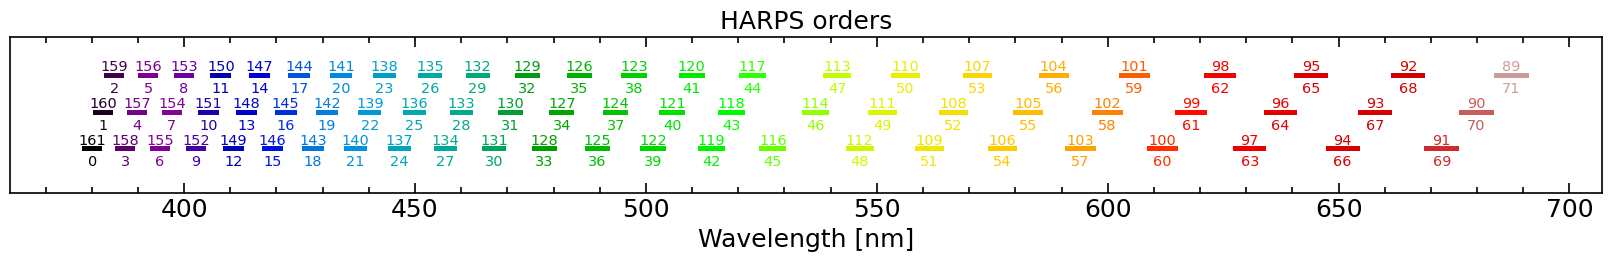

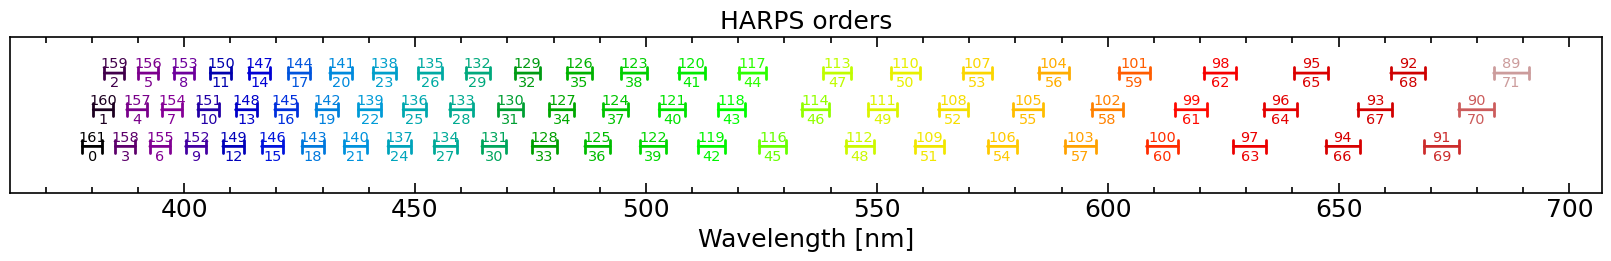

(None, None)

In [9]:
# Quick default plot, saved in dirout with `fig_ords`
# --- Orders in 1 rows: strongly overlapped
harps.fig_ords(sh=True, sv=True, xunit='nm', nrows=1, title=f'{harps.inst_acronym_nice} orders')
# --- Orders in 2 different rows
harps.fig_ords(sh=True, sv=True, xunit='nm', nrows=2, title=f'{harps.inst_acronym_nice} orders')
# --- Orders in 3 different rows
harps.fig_ords(sh=True, sv=True, xunit='nm', nrows=3, title=f'{harps.inst_acronym_nice} orders')
# --- Orders in 3 different rows, with the "real" number and the number from 0 (blue) to nord (red)
harps.fig_ords(sh=True, sv=True, xunit='nm', nrows=3, title=f'{harps.inst_acronym_nice} orders', olabel='ord_real_num')
# --- Orders in 3 different rows, with the "real" number and the number from 0 (blue) to nord (red), style "line"
harps.fig_ords(sh=True, sv=True, style='line', xunit='nm', nrows=3, title=f'{harps.inst_acronym_nice} orders', olabel='ord_real_num')

# --- Orders in 3 different rows, with the "real" number and the number from 0 (blue) to nord (red), color, adjust figure height
fig, ax = plt.subplots(figsize=(16, 2.5), constrained_layout=True)
ax = harps.plot_ords_rectangle(ax=ax, xunit='nm', nrows=3, title=f'{harps.inst_acronym_nice} orders', olabel='ord_real_num', cmap='nipy_spectral')  # rainbow, turbo
plt.show(), plt.close()
# --- Orders in 3 different rows, with the "real" number and the number from 0 (blue) to nord (red), color, adjust figure height and row separation
fig, ax = plt.subplots(figsize=(16, 2.5), constrained_layout=True)
ax = harps.plot_ords_rectangle(ax=ax, xunit='nm', nrows=3, rowsep=0.5, title=f'{harps.inst_acronym_nice} orders', olabel='ord_real_num', cmap='nipy_spectral')  # rainbow, turbo
plt.show(), plt.close()
# --- Orders in 3 different rows, with the "real" number and the number from 0 (blue) to nord (red), color, adjust figure height, style "line"
fig, ax = plt.subplots(figsize=(16, 2.5), constrained_layout=True)
ax = harps.plot_ords_line(ax=ax, xunit='nm', nrows=3, rowsep=0.5, title=f'{harps.inst_acronym_nice} orders', olabel='ord_real_num', cmap='nipy_spectral')  # rainbow, turbo
plt.show(), plt.close()

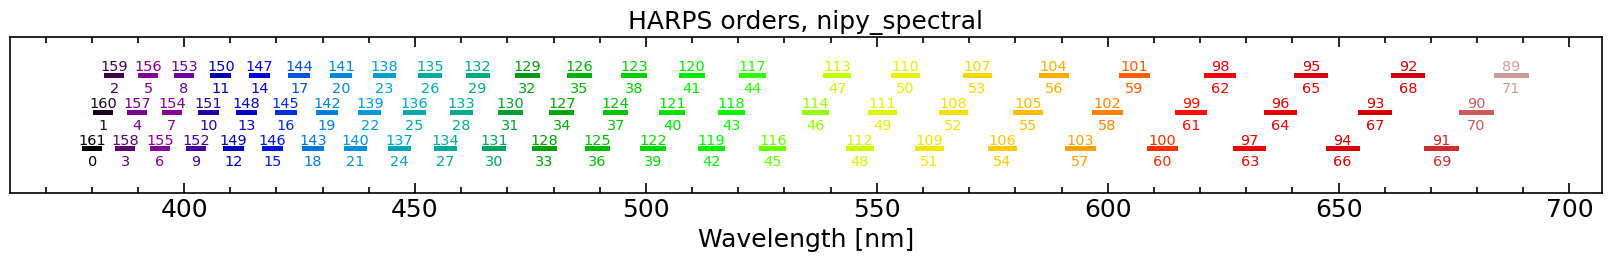

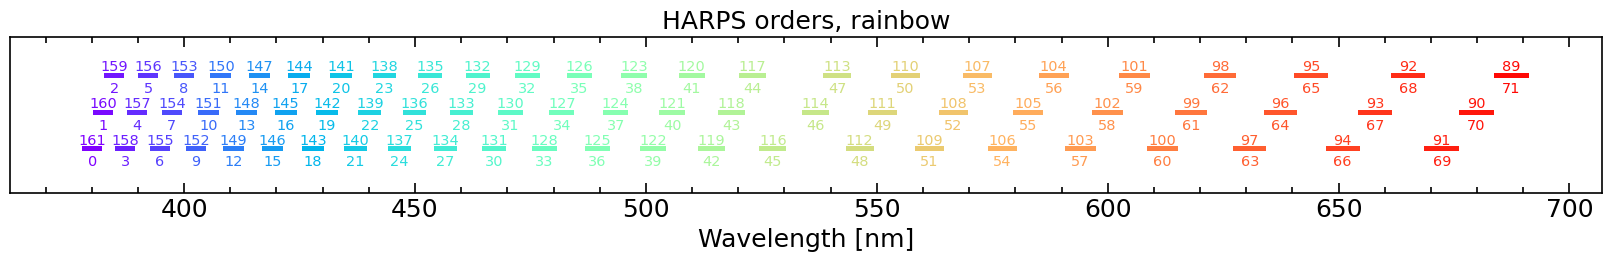

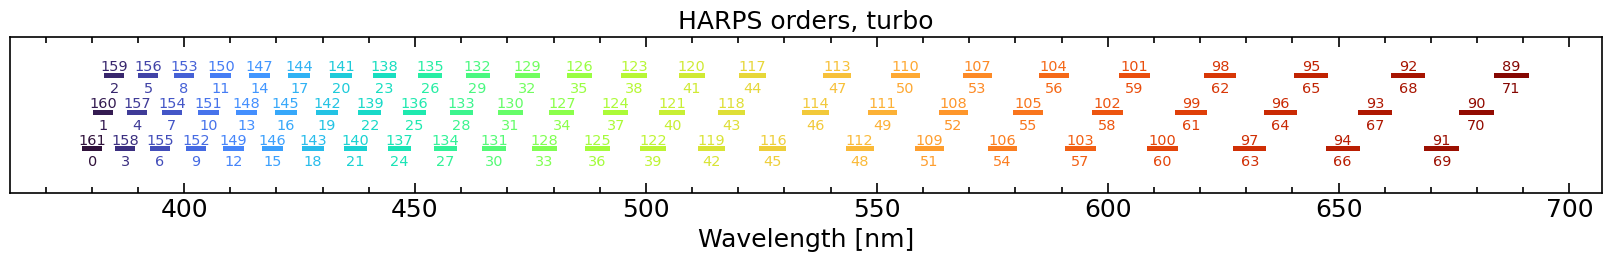

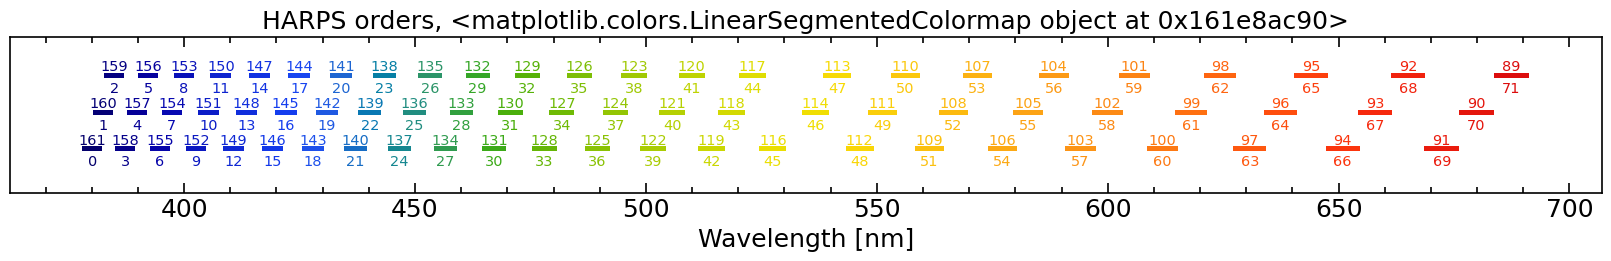

In [17]:
# Test rainbow like colormaps
for cmap in ['nipy_spectral', 'rainbow', 'turbo', cc.cm.rainbow4]:
    fig, ax = plt.subplots(figsize=(16, 2.5), constrained_layout=True)
    ax = harps.plot_ords_rectangle(ax=ax, xunit='nm', nrows=3, rowsep=0.5, title=f'{harps.inst_acronym_nice} orders, {cmap}', olabel='ord_real_num', cmap=cmap)
    plt.show(), plt.close()

### Plot orders several instruments

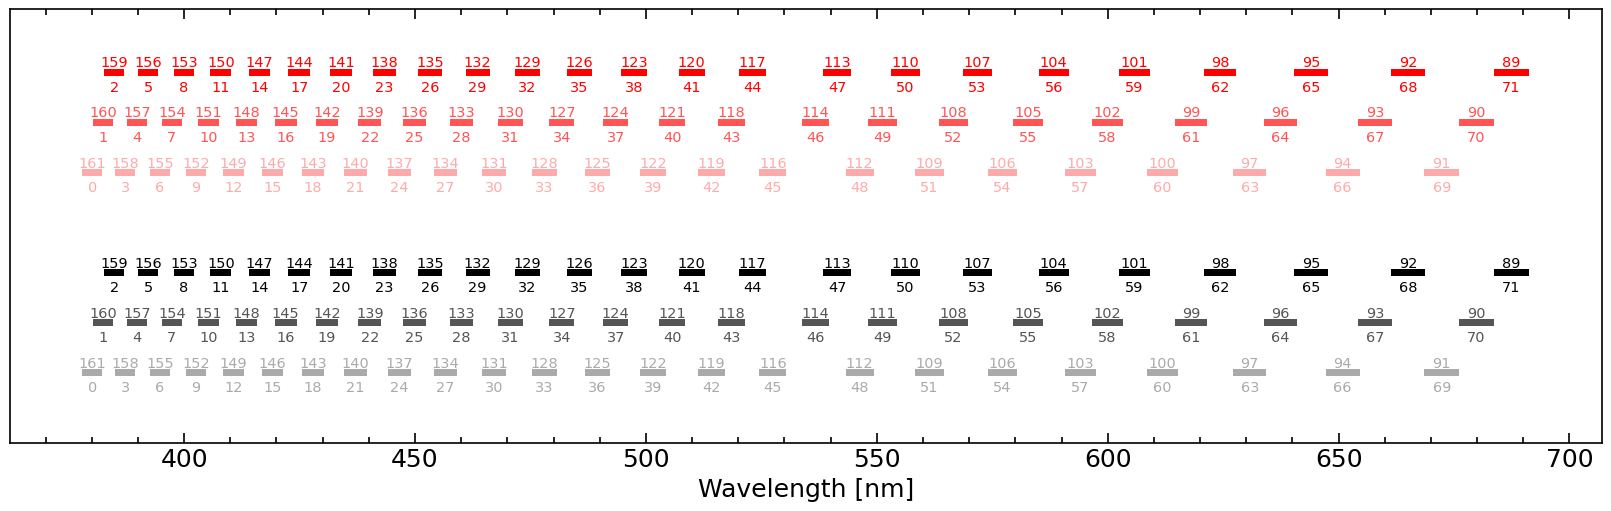

(None, None)

In [ ]:
harps = spc.Spectrograph('harps', dirout)
harps2 = spc.Spectrograph('harps', dirout)

# Change the ybase of the second spectrograph (default is 0)
# Orders in 3 different rows, with the "real" number and the number from 0 (blue) to nord (red), color, adjust figure height and row separation
fig, ax = plt.subplots(figsize=(16, 5), constrained_layout=True)
# harps
ax = harps.plot_ords_rectangle(ax=ax, xunit='nm', nrows=3, rowsep=0.5, olabel='ord_real_num', color='k')

# harps2
ax = harps.plot_ords_rectangle(ax=ax, xunit='nm', nrows=3, rowsep=0.5, olabel='ord_real_num', color='r', ybase=6)

plt.show(), plt.close()